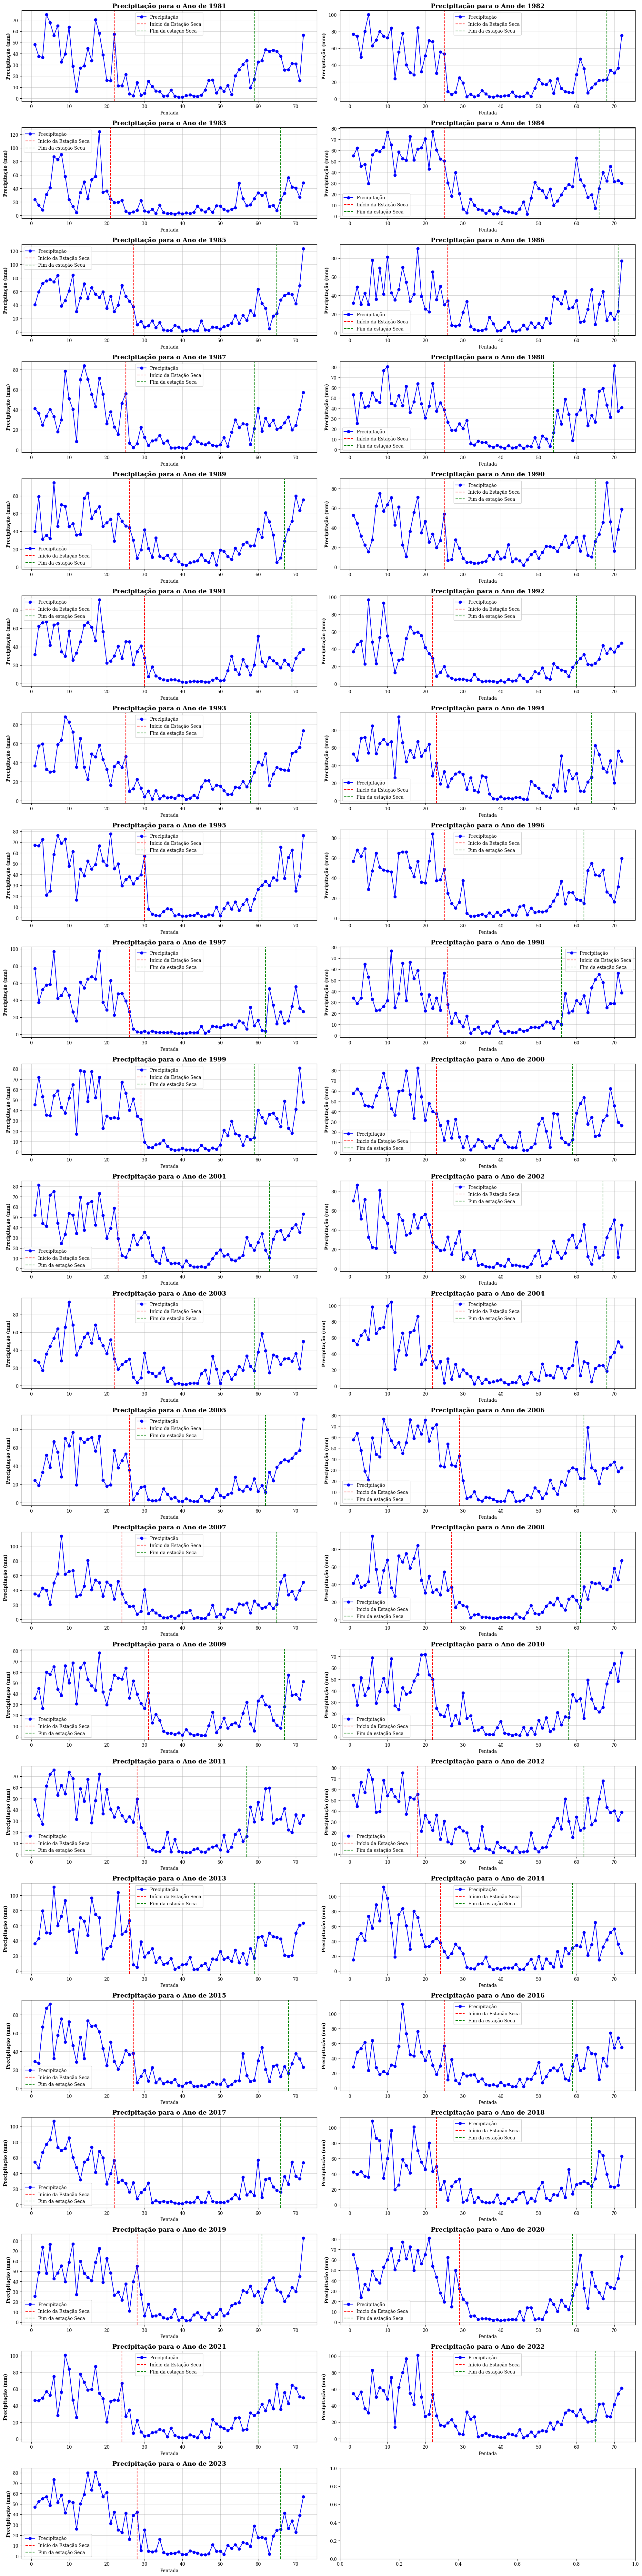

     Ano  Pentada_Início_Seca  Pentada_Fim_Seca  Duração_Seca
0   1981                   22                59            37
1   1982                   25                68            43
2   1983                   21                66            45
3   1984                   25                66            41
4   1985                   27                65            38
5   1986                   26                71            45
6   1987                   25                59            34
7   1988                   25                54            29
8   1989                   26                67            41
9   1990                   25                65            40
10  1991                   30                69            39
11  1992                   22                60            38
12  1993                   25                58            33
13  1994                   23                64            41
14  1995                   30                61            31
15  1996

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'

# Carregar dados do Excel
amazonia = '/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Dados/AreaPreservada1.xlsx'
df = pd.read_excel(amazonia)

# Transformar o DataFrame para formato longo (long format)
df_long = pd.melt(df, id_vars=["Pentada"], var_name="Ano", value_name="Precipitação")

# Remover linhas onde "Ano" não seja um número (exemplo: "Média")
df_long = df_long[pd.to_numeric(df_long["Ano"], errors="coerce").notna()]

# Converter a coluna "Ano" para numérico
df_long["Ano"] = pd.to_numeric(df_long["Ano"])

# Converter a coluna "Pentada" para numérico, removendo a palavra "º"
df_long["Pentada"] = df_long["Pentada"].str.replace("º", "").astype(int)

# Filtrar os dados de 1981 a 2023
df_filtered = df_long[(df_long["Ano"] >= 1981) & (df_long["Ano"] <= 2023)]

# Lista para armazenar informações da estação seca e chuvosa
season_info = []

# Loop pelos anos para calcular A(day) e identificar início e fim das estações
for year in range(1981, 2024):  # Ajustado para incluir 2023
    year_data = df_filtered[df_filtered["Ano"] == year].copy()

    if year_data.empty:
        print(f"Ano {year} não possui dados suficientes para cálculo.")
        continue

    # Calcular a média anual diária
    R_mean = year_data["Precipitação"].mean()

    # Calcular A(day) acumulando precipitação e subtraindo a média acumulada
    year_data["A_day"] = year_data["Precipitação"].cumsum() - R_mean * year_data["Pentada"]

    # Identificar os pontos de mudança em A_day (início e fim da estação seca)
    try:
        min_index = year_data["A_day"].idxmin()  # Índice do mínimo de A(day)
        max_index = year_data["A_day"].idxmax()  # Índice do máximo de A(day)

        # Garantir que o início (mínimo) vem antes do fim (máximo)
        if min_index < max_index:
            inicio_seca = year_data.loc[min_index, "Pentada"]
            fim_seca = year_data.loc[max_index, "Pentada"]
        else:
            inicio_seca = year_data.loc[max_index, "Pentada"]
            fim_seca = year_data.loc[min_index, "Pentada"]
    except IndexError:
        print(f"Ano {year} não possui dados suficientes para identificar estação seca.")
        continue

    # Adicionar informações ao dataframe
    season_info.append({
        "Ano": year,
        "Pentada_Início_Seca": inicio_seca,
        "Pentada_Fim_Seca": fim_seca,
        "Duração_Seca": fim_seca - inicio_seca
    })

# Transformar as informações da estação em DataFrame
season_df = pd.DataFrame(season_info)

# Definir o caminho para salvar a imagem
output_path = "/home/talita/Documentos/calculo_climatologia/estudoEstacaoSeca/Resultados/AreaDesmatada3_analise.pdf"

# Plotar gráficos para visualizar precipitação e A(day)
fig, axes = plt.subplots(nrows=22, ncols=2, figsize=(20, 80))  # Relacao de tamanho, por quantidade de graficos plotados 
axes = axes.flatten()

for i, year in enumerate(range(1981, 2024)):  # Ajustado para 2023
    ax = axes[i]
    year_data = df_filtered[df_filtered["Ano"] == year]

    if year_data.empty:
        ax.set_title(f"Dados faltantes - {year}")
        continue

    # Plotar a precipitação
    ax.plot(year_data["Pentada"], year_data["Precipitação"], label="Precipitação", marker='o', color='blue')

    # Verificar se a coluna A_day existe antes de plotar
    if "A_day" in year_data.columns:
        # Plotar A(day)
        ax.plot(year_data["Pentada"], year_data["A_day"], label="A(day)", color="red", linestyle="--")
    else:
        ax.set_title(f"A coluna A_day não foi criada - {year}")
    
    # Marcar início e fim da estação seca
    dry_year = season_df[season_df["Ano"] == year]
    if not dry_year.empty:
        ax.axvline(x=dry_year["Pentada_Início_Seca"].values[0], color="red", linestyle="--", label="Início da Estação Seca")
        ax.axvline(x=dry_year["Pentada_Fim_Seca"].values[0], color="green", linestyle="--", label="Fim da estação Seca")

    # Configurações do gráfico
    ax.set_title(f"Precipitação para o Ano de {year}", fontweight='bold', fontsize=14)
    ax.set_xlabel("Pentada")
    ax.set_ylabel("Precipitação (mm)",  fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.5)

# Ajustar layout e salvar o gráfico em PDF
plt.tight_layout()
plt.savefig(output_path, format='pdf')  # Salva o gráfico como um PDF
plt.show()



# Exibir as informações da estação seca
print(season_df)


In [3]:
# Lista para armazenar os resultados
precipitation_info = []

for year in range(1981, 2024):  # Ajustado para incluir 2023
    # Filtrar dados do ano
    year_data = df_filtered[df_filtered["Ano"] == year]
    
    if year_data.empty:
        continue

    # Calcular precipitação média anual
    precip_mean_year = year_data["Precipitação"].mean()

    # Obter informações da estação seca
    dry_season = season_df[season_df["Ano"] == year]
    if not dry_season.empty:
        inicio_seca = dry_season["Pentada_Início_Seca"].values[0]
        fim_seca = dry_season["Pentada_Fim_Seca"].values[0]
        
        # Filtrar dados da estação seca
        dry_season_data = year_data[(year_data["Pentada"] >= inicio_seca) & (year_data["Pentada"] <= fim_seca)]
        precip_dry_season = dry_season_data["Precipitação"].sum()
    else:
        precip_dry_season = None  # Caso não haja dados da estação seca

    # Adicionar informações ao novo DataFrame
    precipitation_info.append({
        "Ano": year,
        "Precipitação Média Anual": precip_mean_year,
        "Precipitação na Estação Seca": precip_dry_season
    })

# Criar o novo DataFrame com os resultados
precipitation_df = pd.DataFrame(precipitation_info)

# Exibir o DataFrame
print(precipitation_df)

# Salvar em Excel se necessário
precipitation_df.to_excel("precipitation_analysis.xlsx", index=False)


     Ano  Precipitação Média Anual  Precipitação na Estação Seca
0   1981                 24.532316                    413.011522
1   1982                 30.795640                    567.699964
2   1983                 24.025020                    589.610577
3   1984                 31.756526                    706.387382
4   1985                 34.524739                    560.250261
5   1986                 27.779310                    749.605494
6   1987                 25.249584                    392.497928
7   1988                 30.439251                    297.545381
8   1989                 34.141926                    799.344333
9   1990                 27.086299                    614.638324
10  1991                 27.025315                    507.114134
11  1992                 24.523000                    363.433780
12  1993                 28.882636                    382.993589
13  1994                 32.662801                    698.863211
14  1995                 

In [4]:
# Função para analisar os dados de precipitação
def analyze_precipitation_data(precipitation_df):
    # Precipitação média anual
    mean_precipitation = precipitation_df["Precipitação Média Anual"].mean()

    # Precipitação mínima e máxima e os respectivos anos
    min_precipitation = precipitation_df["Precipitação Média Anual"].min()
    max_precipitation = precipitation_df["Precipitação Média Anual"].max()
    min_year = precipitation_df.loc[precipitation_df["Precipitação Média Anual"].idxmin(), "Ano"]
    max_year = precipitation_df.loc[precipitation_df["Precipitação Média Anual"].idxmax(), "Ano"]

    # Variação percentual ao longo do tempo
    initial_precipitation = precipitation_df.iloc[0]["Precipitação Média Anual"]
    final_precipitation = precipitation_df.iloc[-1]["Precipitação Média Anual"]
    percentage_change = ((final_precipitation - initial_precipitation) / initial_precipitation) * 100

    # Criar um DataFrame com os resultados formatados
    analysis_results = pd.DataFrame({
        "Métrica": [
            "Precipitação Média Anual (mm)",
            "Precipitação Mínima (mm) (Ano)",
            "Precipitação Máxima (mm) (Ano)",
            "Variação Percentual ao longo dos anos (%)"
        ],
        "Valor": [
            f"{mean_precipitation:.2f}",
            f"{min_precipitation:.2f} ({min_year})",
            f"{max_precipitation:.2f} ({max_year})",
            f"{percentage_change:.2f}%"
        ]
    })

    return analysis_results

# Realizar a análise de precipitação
precipitation_analysis = analyze_precipitation_data(precipitation_df)

# Exibir o DataFrame de resultados
print(precipitation_analysis)

# Salvar os resultados em Excel, se necessário
precipitation_analysis.to_excel("precipitation_analysis_summary.xlsx", index=False)


                                     Métrica         Valor
0              Precipitação Média Anual (mm)         29.28
1             Precipitação Mínima (mm) (Ano)  24.03 (1983)
2             Precipitação Máxima (mm) (Ano)  35.73 (2013)
3  Variação Percentual ao longo dos anos (%)        10.71%


In [3]:
# Cálculos estatísticos sobre a duração da estação seca
def analyze_season_data(season_df):
    # Duração média da estação seca
    mean_duration = season_df["Duração_Seca"].mean()

    # Duração mínima e máxima
    min_duration = season_df["Duração_Seca"].min()
    max_duration = season_df["Duração_Seca"].max()

    # Ano com menor e maior duração
    min_year = season_df.loc[season_df["Duração_Seca"].idxmin(), "Ano"]
    max_year = season_df.loc[season_df["Duração_Seca"].idxmax(), "Ano"]

    # Aumento percentual da duração ao longo dos anos
    initial_duration = season_df.iloc[0]["Duração_Seca"]
    final_duration = season_df.iloc[-1]["Duração_Seca"]
    percentage_change = ((final_duration - initial_duration) / initial_duration) * 100

    # Exibir resultados no terminal
    print("\n--- Análise da Duração da Estação Seca ---")
    print(f"Duração Média (pentadas): {mean_duration:.2f}")
    print(f"Duração Mínima (pentadas): {min_duration} (Ano: {min_year})")
    print(f"Duração Máxima (pentadas): {max_duration} (Ano: {max_year})")
    print(f"Aumento Percentual ao longo dos anos: {percentage_change:.2f}%\n")

    # Retornar os resultados (caso precise usá-los depois)
    return {
        "Duração Média (pentadas)": mean_duration,
        "Duração Mínima (pentadas)": min_duration,
        "Ano Mínimo": min_year,
        "Duração Máxima (pentadas)": max_duration,
        "Ano Máximo": max_year,
        "Aumento Percentual (%)": percentage_change
    }

# Realizar análises e exibir no terminal
analysis_results = analyze_season_data(season_df)




--- Análise da Duração da Estação Seca ---
Duração Média (pentadas): 37.42
Duração Mínima (pentadas): 29 (Ano: 1988)
Duração Máxima (pentadas): 46 (Ano: 2004)
Aumento Percentual ao longo dos anos: 2.70%



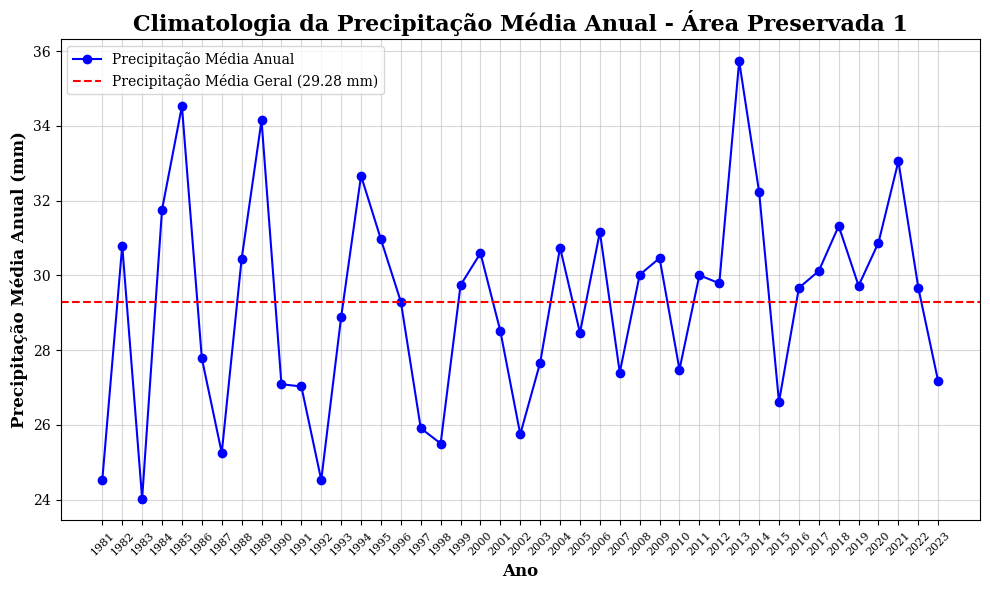

In [5]:
import matplotlib.pyplot as plt

# Função para plotar o gráfico de precipitação
def plot_precipitation(precipitation_df):
    # Cálculo da precipitação média anual
    mean_precipitation = precipitation_df["Precipitação Média Anual"].mean()

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(
        precipitation_df["Ano"], 
        precipitation_df["Precipitação Média Anual"], 
        label="Precipitação Média Anual", 
        color='blue', 
        marker='o'
    )
    plt.axhline(mean_precipitation, color='red', linestyle='--', label=f"Precipitação Média Geral ({mean_precipitation:.2f} mm)")

    # Configurar título e rótulos
    plt.title("Climatologia da Precipitação Média Anual - Área Preservada 1", fontsize=16, fontweight='bold')
    plt.xlabel("Ano", fontsize=12, fontweight='bold')
    plt.ylabel("Precipitação Média Anual (mm)", fontsize=12, fontweight='bold')
    plt.xticks(precipitation_df["Ano"], rotation=45, fontsize=8)
    plt.grid(alpha=0.5)

    # Legenda
    plt.legend()

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar o gráfico
plot_precipitation(precipitation_df)


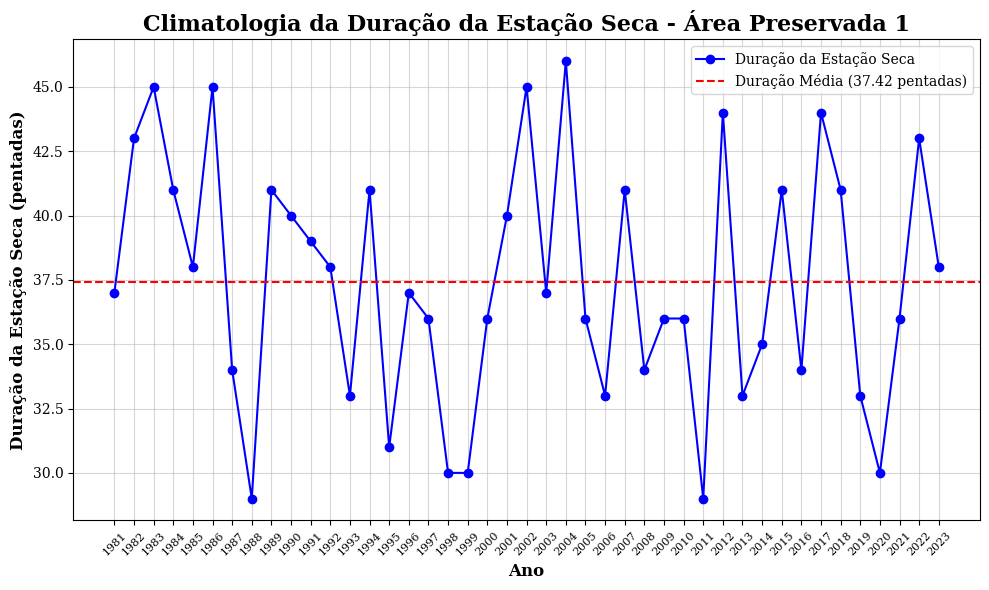

In [5]:
import matplotlib.pyplot as plt

# Função para plotar o gráfico
def plot_dry_season_duration(season_df):
    # Cálculo da duração média
    mean_duration = season_df["Duração_Seca"].mean()

    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(season_df["Ano"], season_df["Duração_Seca"], label="Duração da Estação Seca",  color='blue', marker='o')
    plt.axhline(mean_duration, color='red', linestyle='--', label=f"Duração Média ({mean_duration:.2f} pentadas)")

    # Configurar título e rótulos
    plt.title("Climatologia da Duração da Estação Seca - Área Preservada 1", fontsize=16, fontweight='bold')
    plt.xlabel("Ano", fontsize=12, fontweight='bold')
    plt.ylabel("Duração da Estação Seca (pentadas)", fontsize=12, fontweight='bold')
    plt.xticks(season_df["Ano"], rotation=45, fontsize=8)
    plt.grid(alpha=0.5)

    # Legenda
    plt.legend()
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para plotar
plot_dry_season_duration(season_df)


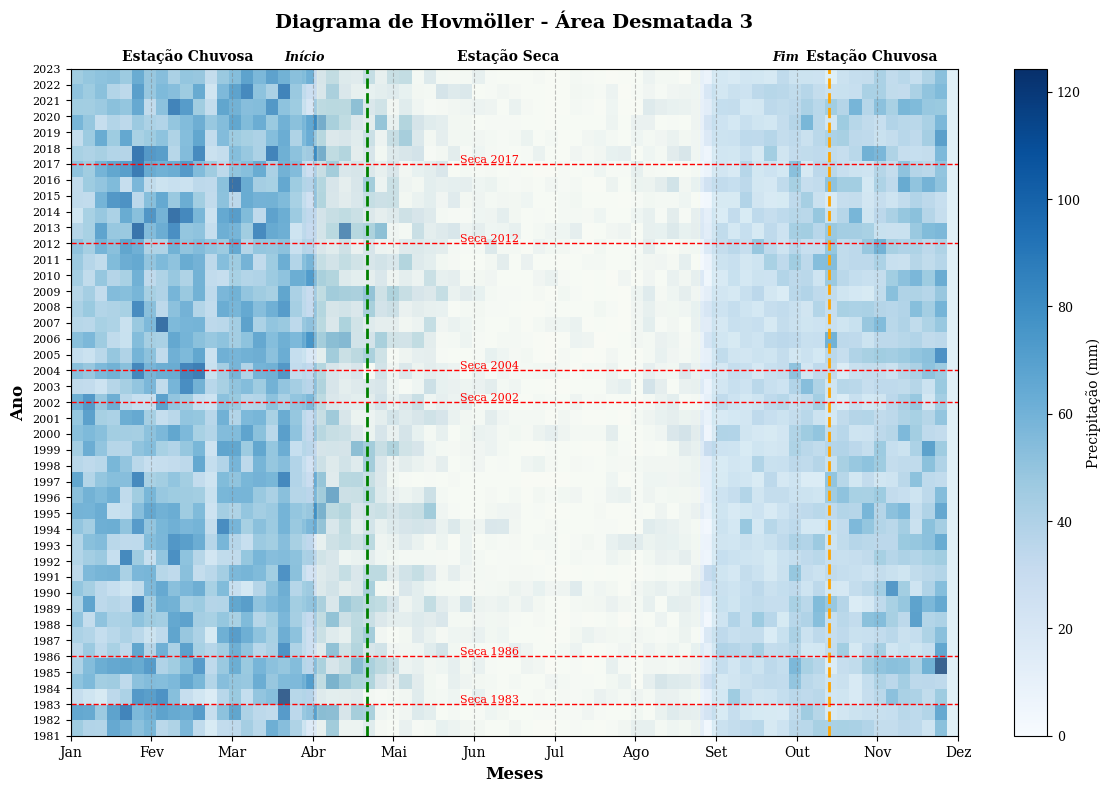

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Dados necessários (simulados)
anos = season_df["Ano"]
inicio_seca = season_df["Pentada_Início_Seca"]
fim_seca = season_df["Pentada_Fim_Seca"]

duracao_seca = fim_seca - inicio_seca

# Criar matriz para o diagrama de Hovmöller usando precipitação (valores simulados para exemplo)
hovmoller_matrix = np.zeros((len(anos), 73))  # 73 pentadas em um ano

# Preenchendo a matriz com dados de precipitação
for i, year in enumerate(anos):
    year_data = df_filtered[df_filtered["Ano"] == year]
    for pentada in year_data["Pentada"]:
        hovmoller_matrix[i, pentada - 1] = year_data.loc[year_data["Pentada"] == pentada, "Precipitação"].values[0]

# Calcular os valores médios de início e fim da estação seca
inicio_seca_medio = inicio_seca.mean()
fim_seca_medio = fim_seca.mean()

# Identificar os anos com maior duração da estação seca
top_duracao_indices = duracao_seca.nlargest(6).index
seca_anos = anos[top_duracao_indices]
seca_pentadas = [35] * len(seca_anos)  # Exemplo: linha em pentada 35

# Configurações do gráfico
plt.figure(figsize=(12, 8))
plt.imshow(
    hovmoller_matrix,
    aspect="auto",
    cmap="Blues",  # Gradiente de azul
    origin="lower",
    extent=[1, 73, anos.min(), anos.max()],
)

# Adicionando áreas para estações seca e chuvosa
plt.axvspan(1, 20, color="lightblue", alpha=0.3)
plt.axvspan(21, 52, color="lightyellow", alpha=0.3)
plt.axvspan(53, 73, color="lightblue", alpha=0.3)

# Adicionar texto para identificar as estações
plt.text(10.5, anos.max() + 0.5, "Estação Chuvosa", fontsize=10, ha="center", fontweight="bold")
plt.text(36.5, anos.max() + 0.5, "Estação Seca", fontsize=10, ha="center", fontweight="bold")
plt.text(66, anos.max() + 0.5, "Estação Chuvosa", fontsize=10, ha="center", fontweight="bold")
plt.text(20, anos.max() + 0.5, "Início", fontsize=9, ha="center", fontweight="bold", style="italic")
plt.text(59, anos.max() + 0.5, "Fim", fontsize=9, ha="center", fontweight="bold", style="italic")

# Adicionar linhas tracejadas para o início e fim médio da estação seca
plt.axvline(x=inicio_seca_medio, color="green", linestyle="--", linewidth=2, label="Início Médio da Estação Seca")
plt.axvline(x=fim_seca_medio, color="orange", linestyle="--", linewidth=2, label="Fim Médio da Estação Seca")

# Marcar eventos de seca com linhas e anotações
for ano, pentada in zip(seca_anos, seca_pentadas):
    plt.axhline(y=ano, color="red", linestyle="--", linewidth=1)
    plt.text(
        pentada,
        ano + 0.1,
        f"Seca {ano}",
        color="red",
        fontsize=8,
        ha="center",
        #bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"),
    )

# Barra de cores e rótulos
cbar = plt.colorbar(label="Precipitação (mm)")
cbar.ax.tick_params(labelsize=9)
plt.title(
    "Diagrama de Hovmöller - Área Desmatada 3",
    fontsize=14,
    fontweight="bold",
    y=1.05
)
plt.xlabel("Meses", fontsize=12, fontweight="bold")
plt.ylabel("Ano", fontsize=12, fontweight="bold")
plt.xticks(ticks=np.linspace(1, 73, num=12), labels=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"], fontsize=10)
#plt.yticks(ticks=anos, labels=anos, fontsize=10)
plt.yticks(ticks=anos, labels=anos, fontsize=8)

plt.grid(axis="x", color="gray", linestyle="--", alpha=0.5)

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()



--- Análise de Regressão Linear ---
Equação da linha de tendência: Duração = -0.05 * Ano + 137.19
Inclinação (m): -0.05
Coeficiente de determinação (R²): 0.02


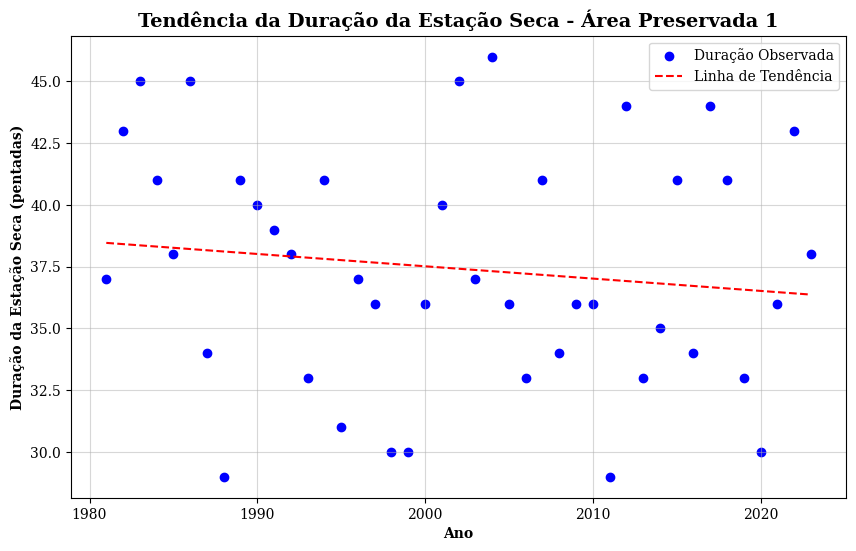

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados para análise
anos = season_df["Ano"]
duracao_seca = season_df["Duração_Seca"]

# Ajustar uma regressão linear (y = mx + b)
X = sm.add_constant(anos)  # Adiciona a constante (intercepto)
model = sm.OLS(duracao_seca, X).fit()  # Ajusta o modelo de regressão
trend_line = model.predict(X)  # Calcula a linha de tendência

# Coeficientes da regressão
coef_angular = model.params[1]  # Inclinação (m)
coef_intercepto = model.params[0]  # Intercepto (b)
r_squared = model.rsquared  # Coeficiente de determinação (qualidade do ajuste)

# Exibir resultados
print("\n--- Análise de Regressão Linear ---")
print(f"Equação da linha de tendência: Duração = {coef_angular:.2f} * Ano + {coef_intercepto:.2f}")
print(f"Inclinação (m): {coef_angular:.2f}")
print(f"Coeficiente de determinação (R²): {r_squared:.2f}")

# Plotar os dados e a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(anos, duracao_seca, color='blue', label="Duração Observada")
plt.plot(anos, trend_line, color='red', linestyle='--', label="Linha de Tendência")
plt.title("Tendência da Duração da Estação Seca - Área Preservada 1", fontweight='bold', fontsize=14)
plt.xlabel("Ano", fontweight='bold')
plt.ylabel("Duração da Estação Seca (pentadas)", fontweight='bold')
plt.legend()
plt.grid(alpha=0.5)
plt.show()



--- Análise de Regressão Linear ---
Equação da linha de tendência: Duração = -0.05 * Ano + 137.19
Inclinação (m): -0.05
Coeficiente de determinação (R²): 0.02


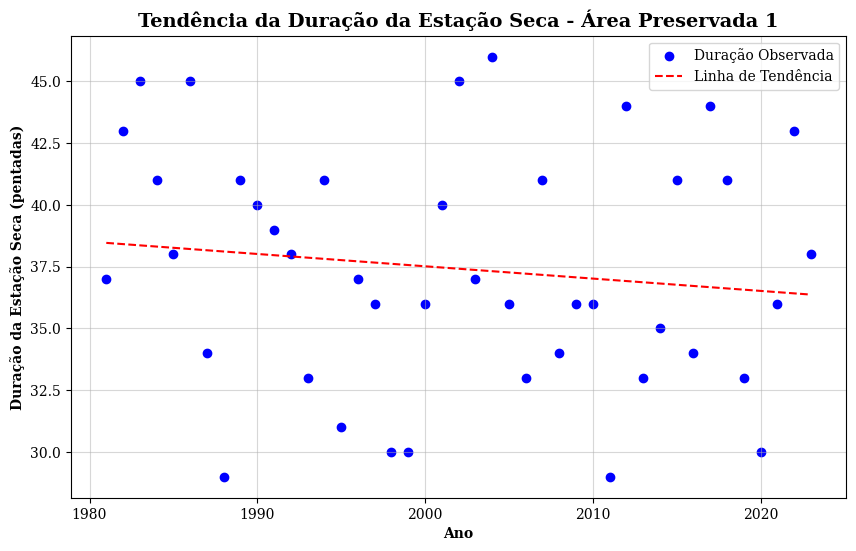

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados para análise
anos = season_df["Ano"]
duracao_seca = season_df["Duração_Seca"]

# Ajustar uma regressão linear (y = mx + b)
X = sm.add_constant(anos)  # Adiciona a constante (intercepto)
model = sm.OLS(duracao_seca, X).fit()  # Ajusta o modelo de regressão
trend_line = model.predict(X)  # Calcula a linha de tendência

# Coeficientes da regressão
coef_angular = model.params[1]  # Inclinação (m)
coef_intercepto = model.params[0]  # Intercepto (b)
r_squared = model.rsquared  # Coeficiente de determinação (qualidade do ajuste)

# Exibir resultados
print("\n--- Análise de Regressão Linear ---")
print(f"Equação da linha de tendência: Duração = {coef_angular:.2f} * Ano + {coef_intercepto:.2f}")
print(f"Inclinação (m): {coef_angular:.2f}")
print(f"Coeficiente de determinação (R²): {r_squared:.2f}")

# Criar um DataFrame com os resultados para exportação
resultados = pd.DataFrame({
    "Ano": anos,
    "Duração Observada": duracao_seca,
    "Linha de Tendência": trend_line
})

# Salvar os dados no Excel
resultados.to_excel("dados_analise_area_preservada1.xlsx", index=False)

# Plotar os dados e a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(anos, duracao_seca, color='blue', label="Duração Observada")
plt.plot(anos, trend_line, color='red', linestyle='--', label="Linha de Tendência")
plt.title("Tendência da Duração da Estação Seca - Área Preservada 1", fontweight='bold', fontsize=14)
plt.xlabel("Ano", fontweight='bold')
plt.ylabel("Duração da Estação Seca (pentadas)", fontweight='bold')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Função para análise de tendência temporal
def analyze_trend_and_plot(season_df):
    # Calcular a regressão linear para a duração da estação seca
    slope, intercept, r_value, p_value, std_err = linregress(season_df["Ano"], season_df["Duração_Seca"])
    
    # Criar linha de tendência
    season_df["Trend_Line"] = intercept + slope * season_df["Ano"]

    # Plotar os resultados
    plt.figure(figsize=(10, 6))
    plt.plot(season_df["Ano"], season_df["Duração_Seca"], label="Duração da Estação Seca (Observada)", marker='o', color='blue')
    plt.plot(season_df["Ano"], season_df["Trend_Line"], label=f"Tendência (slope={slope:.2f})", color='red', linestyle="--")

    # Configurações do gráfico
    plt.title("Análise de Tendência - Duração da Estação Seca", fontsize=16, fontweight='bold')
    plt.xlabel("Ano", fontsize=12, fontweight='bold')
    plt.ylabel("Duração da Estação Seca (Pentadas)", fontsize=12, fontweight='bold')
    plt.grid(alpha=0.5)
    plt.legend()

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

    # Exibir resultados estatísticos
    print("Análise de Tendência - Duração da Estação Seca")
    print(f"Coeficiente Angular (Slope): {slope:.2f}")
    print(f"Intercepto: {intercept:.2f}")
    print(f"Coeficiente de Determinação (R²): {r_value**2:.2f}")
    print(f"Valor-p: {p_value:.3f}")
    print("Conclusão:", "Há uma tendência significativa" if p_value < 0.05 else "Não há uma tendência significativa")
    print("\n")

# Aplicar a função para o DataFrame season_df
analyze_trend_and_plot(season_df)


NameError: name 'season_df' is not defined